# NumMod, Skoltech, Term 3, 2021

## Problem Set 1

### Problem 1 (30pt)

Consider the following function
$$f(x) = \sqrt{x}$$
on the interval $x \in [0, 1]$.

* (a) Interpolate the function with piecewise constant and piecewise linear interpolation on a uniform mesh. Find, approximately, the maximal error of interpolation (you can sample the function at several points inside each interpolation interval), as a function of the interval length.

In [1]:
import numpy as np
import numpy.linalg as lin
import scipy
import matplotlib.pyplot as plt

In [2]:
def f_true(x):
    return np.sqrt(x)

def uniform_grid(n):
    return np.linspace(0, 1, n)

x_dense_grid = uniform_grid(100)

In [3]:
def plot_interpolation(f, label=""):
    y_dense_grid = [f(x) for x in x_dense_grid]
    plt.plot(x_dense_grid, y_dense_grid, label=label)

def plot_error(f, label=""):
    y_dense_grid = [f(x)-f_true(x) for x in x_dense_grid]  
    plt.plot(x_dense_grid, y_dense_grid, label=label)

### Piecewise interpolation

* The idea of `piecewise constant interpolation` is to define the nearest points to the existing one, and assign the same value (order of error is $O(h))$:

<img src='Fig\Piecewise_constant.png' width="300" height="300">

* `Piecewise linear interpolation` is the method in which a straight line segment is used to connect each pair of adjacent points:

$$
p(x) = y_k + \frac{ y_{k+1} - y_{k} }{x_{k+1} - x_{k}}(x - x_k) + O(h^2), \quad \text{for } x \in [x_k, x_{k+1}]
$$


In [4]:
def f_pwc(x):
    x_nearest_ind = np.abs(x_grid - x).argmin()
    x_nearest = x_grid[x_nearest_ind]
    return f_true(x_nearest)

def f_pwlin(x):
    x_nearest_ind = np.abs(x_grid - x).argmin()
    x_nearest = x_grid[x_nearest_ind]

    if x_nearest == x:
        return f_true(x_nearest)
    elif x_nearest > x:
        x_nearest_left = x_grid[x_nearest_ind-1]
        x_nearest_right = x_grid[x_nearest_ind]
    else:
        x_nearest_left = x_grid[x_nearest_ind]
        x_nearest_right = x_grid[x_nearest_ind+1]
        
    weight = (x - x_nearest_left) / (x_nearest_right - x_nearest_left)   
    return f_true(x_nearest_left) + (f_true(x_nearest_right) - f_true(x_nearest_left)) * weight

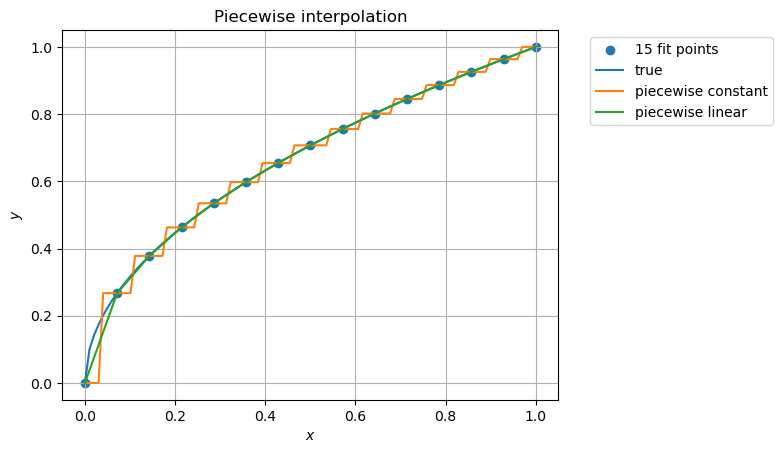

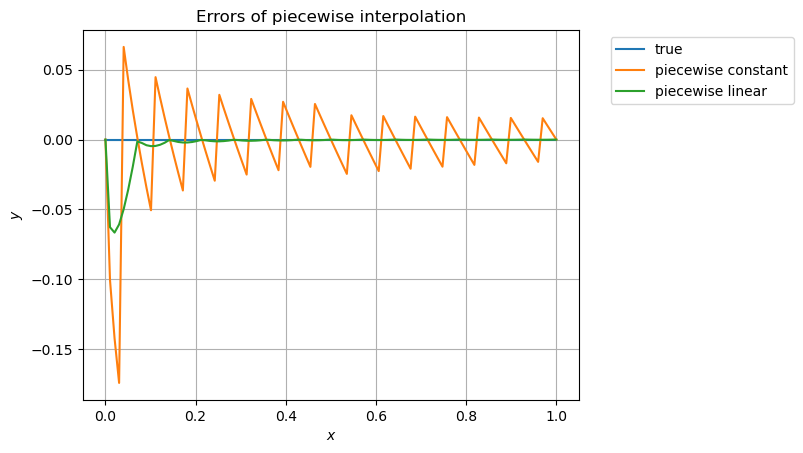

In [5]:
grid_points = 15
x_grid = uniform_grid(grid_points)
y_grid = [f_true(x) for x in x_grid]
plt.scatter(x_grid, y_grid, label=f"{grid_points} fit points")

plot_interpolation(f_true, label="true")
plot_interpolation(f_pwc, label="piecewise constant")
plot_interpolation(f_pwlin, label="piecewise linear")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Piecewise interpolation")
plt.grid()
plt.show()

# Errors
plot_error(f_true, label=f"true")
plot_error(f_pwc, label=f"piecewise constant")
plot_error(f_pwlin, label=f"piecewise linear")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of piecewise interpolation")
plt.grid()
plt.show()

* (b) Find the integral of $f(x)$ on the interval $[0,1]$ by using the midpoint rule, the trapeziodal rule and Simpson's method. Compute the error and compare the error between the three methods. Which is the order of convergence of each of these three methods.

The `analytical value of integral` on the interval $[0,1]$ is 2 / 3.

* Midpoint rule ($O(h^2)$).
* Trapezoidal rule ($O(h^2)$).
* Simpson's method ($O(h^4)$).

In [6]:
a, b = (0, 1) # the interval
true_val = 2 / 3

In [7]:
# f - func to integrate
# n - number of segments on [a, b]

def int_rect_middle(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*(i+0.5)) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


def int_trap(f, n):
    h = (b - a) / n
    y_grid = np.array([
        (f(a + h*i) + f(a + h*(i+1))) / 2
                      for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value

def int_simps(f, n):
    int_value=0
    h = (b - a) / n
    for i in np.arange(a + h / 2, b + h / 2, h):
        int_value += h / 6 * (f(i - h / 2) + 4 * f(i) + f(i + h / 2))
    return int_value

In [8]:
int_methods = [
    int_rect_middle,
    int_trap,
    int_simps
]

int_rect_middle E = 0.05455 * h^1.48492
int_trap        E = 0.19511 * h^1.49132
int_simps       E = 0.02870 * h^1.50000


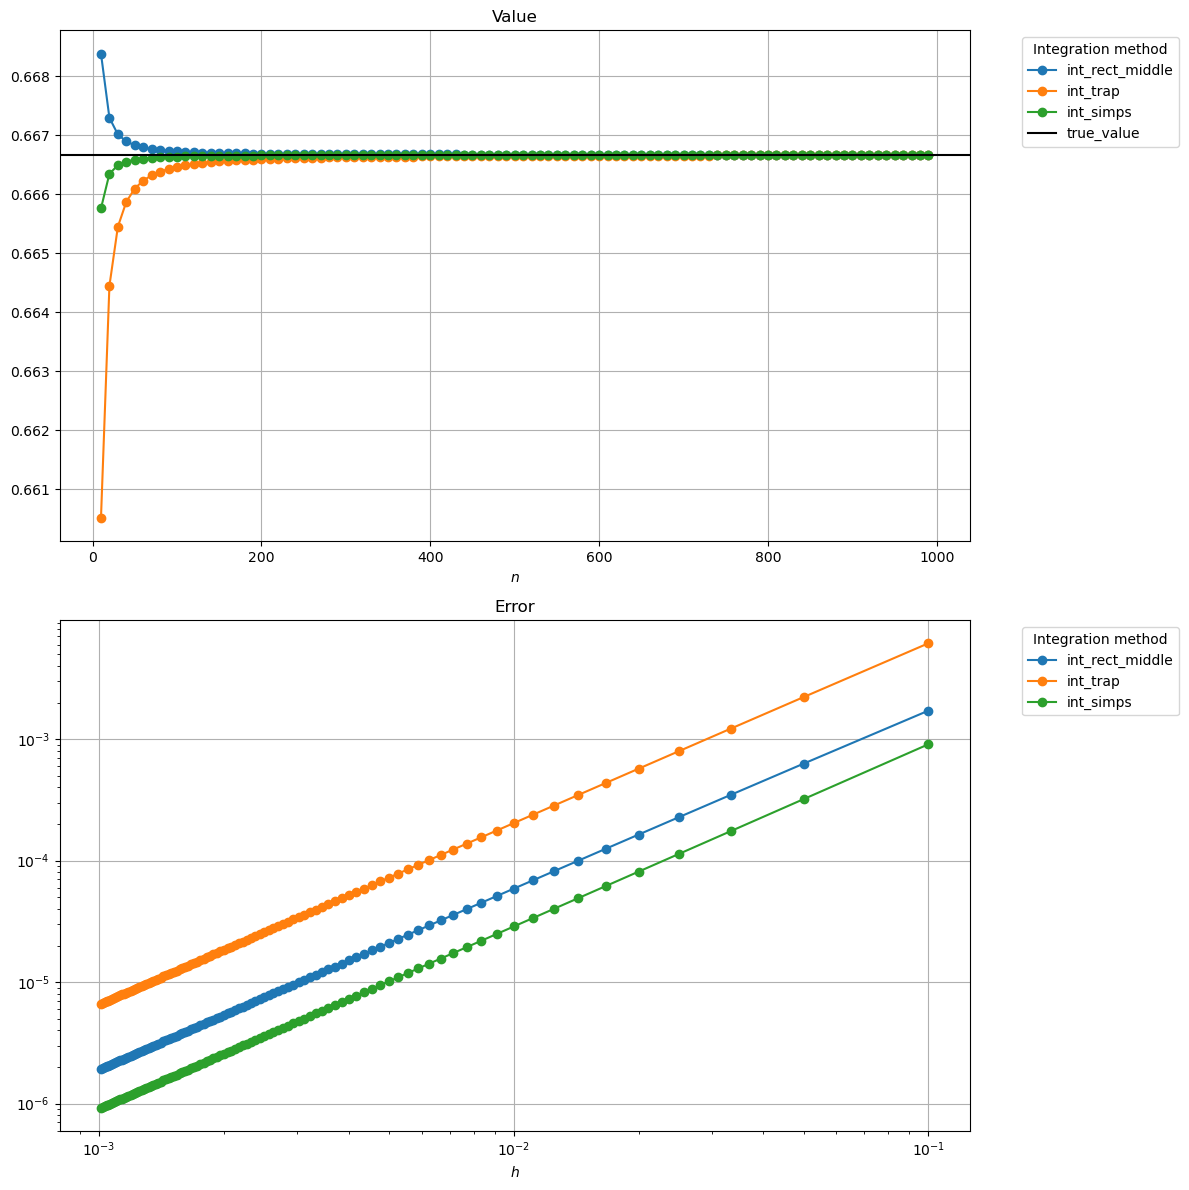

In [9]:
n_grid = range(10, 1000, 10)
h_grid = [(b-a)/n for n in n_grid]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axes[0].set_title("Value")
axes[1].set_title("Error")

# Compute integrals and errors for each method
for int_method in int_methods:
    int_vals = np.array([int_method(f_true, n) for n in n_grid])
    axes[0].plot(n_grid, int_vals, "o-", label=int_method.__name__) 
    
    err_vals = np.abs(int_vals - true_val)
    axes[1].plot(h_grid, err_vals, "o-", label=int_method.__name__)
    # get the error from polyfit
    poly_coeffs = np.polyfit(np.log(h_grid), np.log(err_vals), 1)
    print(f"{int_method.__name__:15} E = {np.exp(poly_coeffs[1]):.5f} * h^{poly_coeffs[0]:.5f}")


axes[0].axhline(true_val, label="true_value", color="black")
axes[0].set_xlabel("$n$")
axes[0].grid()

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("$h$")
axes[1].grid()

for axe in axes:
    axe.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Integration method")

fig.tight_layout() 
plt.show()

### Modeling a Cantilever Beam

Consider a beam fixed at one end (called a [cantilever](http://en.wikipedia.org/wiki/Cantilever) beam) as shown here:
<img src='Fig\beam_basic.png'>

<a id="eq"></a>
Its deflection from the equilibrium position is described by the deflection $u = u(x)$ which satisfies the boundary-value problem for the [Euler-Bernoulli equation](http://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory)
$$ (EIu'')'' = 0 \qquad \qquad \quad $$
$$u(0)=0 \qquad u'(0)=0 \qquad \qquad (1)$$
$$u''(L)=0 \qquad (EIu'')'(L)=P \qquad \qquad \quad $$

where $P$ is the force applied to the beam’s end, $E$ is the (constant) elastic modulus (a material’s property) and $I$ is the second moment of the area of the cross-section. If the cross-section is a rectangle with height $~H = H(x)$ and the width is $W$ then  $~I = I(x) = WH(x)^3/12$ (see more details in Wikipedia under the link above).

<a id="eq2"></a>
To solve the problem we rewrite it as a system
$$ u'' = v $$
$$ (EIv)'' =0 $$
$$u(0)=0 \qquad u'(0)=0 \qquad \qquad (2)$$
$$v(L)=0 \qquad (EIv)'(L)=P \qquad \qquad \quad $$

### Problem 2 (40pt)

Assume that $~I = I(x)$ is constant and the mesh is chosen as it is described in Proposition 1.

* **(10pt)** Write a code that implements this finite difference problem solving the system (2)

### `Solution algorithm` is the <u>next</u>:

From equation ([2](#eq2)) for `u` we have left boundary conditions, and for `v` right ones. Hence, Let's solve the equations for `u` and `v` at the same time.

1) Let's define the grid:
$$~h = L/N~,  ~x_i = hi~,  ~i = -1,..., N + 1~$$
2) Equation for $u$ in the discrete form:
$$
\frac{u_{N + 1} − 2u_N + u_{N - 1}}{h^2} = v_N,
$$
Boundary conditions:
$$
u_0 = 0,
$$
$$
\frac{u_{1} - u_{- 1}}{2h} = 0.
$$
3) Equation for $v$ in the discrete form:
$$
\frac{v_{N + 1} − 2v_N + v_{N - 1}}{h^2} = 0,
$$
Boundary conditions:
$$
v_N = 0,
$$
$$
\frac{v_{N+1} - v_{N-1}}{2h} = \frac{P}{EI}.
$$
4) Finally, let's create four block matrix:

$$
\begin{pmatrix}
1 & -2 & 1 & 0 & \ldots && 0 & -h^2 & 0 & \ldots\\
0 & 1 & -2 & 1 & 0 & \ldots && 0 & -h^2 & 0  & \ldots\\
    &&&\ddots\ &&&&&&\ddots\\
&&\ldots 0 & 1 & -2 & 1 &&&&\ldots 0 & -h^2 & 0\\
0 & 1 & 0 &\ldots\\
-1 & 0 & 1 &\ldots\\
0 & 0 & 0 & \ldots&&\ldots & 1 & -2 & 1 & 0 & \ldots\\
&&&&&\ldots & 0 & 1 & -2 & 1 &0 & \ldots\\
   &&&&&&&&&\ddots\\
&&&&&\ldots &&& 0 & 1 & -2 & 1 \\
&&&&&\ldots &&&& 0 & 1 & 0 \\
&&&&&\ldots &&&& -1 & 0 & 1 \\
\end{pmatrix} \begin{pmatrix}u_{-1} \\ u_{0} \\ u_{1} \\ \vdots \\ u_{N}\\ u_{N + 1} \\ v_{-1} \\ v_{0} \\ v_{1}\\  \vdots  \\ v_{N} \\ v_{N + 1}  \end{pmatrix} = \begin{pmatrix}0\\ 0\\ 0\\ \\ \\ \\ \vdots \\ \\ \\0 \\ 0 \\ \frac{2Ph}{EI}  \end{pmatrix}
$$

In [10]:
def A_matrix_u(n): 
    A = np.zeros((n + 3, n + 3))
    # Boundaries
    A[-2][1] = 1
    A[-1][0], A[-1][2] = -1, 1
    # Diagonals
    for k in range(0, n+1):
        A[k][k] = 1
        A[k][k+1] = -2
        A[k][k+2] = 1
    return A

def A_matrix_v_u(n, h):
    A = np.zeros((n + 3, n + 3))
    # Diagonals
    for k in range(0, n + 1):
        A[k][k+1] = -h**2
    return A
    
def A_matrix_zero(n):
    A = np.zeros((n + 3, n + 3))
    return A
    
    
def A_matrix_v(n):
    A = np.zeros((n + 3, n + 3))
    # Boundaries
    A[-2][-2] = 1
    A[-1][-1], A[-1][-3]  = 1, -1
    # Diagonals
    for k in range(0, n + 1):
        A[k][k] = 1
        A[k][k+1] = -2
        A[k][k+2] = 1
    return A

def b_u_v(n, h, P, E, I):
    b_u_v = np.zeros(2*(n + 3))
    b_u_v[-1] = 2*P*h/E/I
    return b_u_v

* **(10pt)** For the given parameters $E = 2.5\, \text{GPa}$, $H = 7\,\text{mm}$, $W = 3\,\text{mm}$, $L = 25\, \text{cm}$, $P = m \cdot g, m = 200\,\text{g}, g = 9810\,\text{mm}/\text{s}^2$, $h = L/20$ use your code to compute the solution $u_h = (u_h(−h), . . . , u_h(L + 2h))$. What is the computed deflection of the right end, $u_h(L)$?

<!-- NOT NEEDED: 
*  (Optional.) Upload the values $u(0), u(h), ... , u(L)$ at SI units (in meters in this case) to Canvas as a text file named *Your_Name.txt* with numbers separated by a newline. The first one who does it correctly will get a non-material bonus. (The details on uploading to Canvas may be changed later.)
-->

In [11]:
# Parameters of the task, H is const

E = 2.5 * 10**9 # Pa
H = 7 * 10**(-3) # m
W = 3 * 10**(-3) # m
L = 0.25 # m
m = 0.2 # kg
g = 9.81 # m/s^2
I = W * H**3 / 12
P = m*g

# Grid
n = 20
h = L/n
x_grid = np.linspace(0, L, n+3)

In [12]:
A_general = np.block([[A_matrix_u(n), A_matrix_v_u(n, h)], [A_matrix_zero(n), A_matrix_v(n)]])
A_general # four block matrix

array([[ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  1.]])

In [13]:
b_u_v(n, h, P, E, I) # free vector in the matrix system

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22880466])

Computed deflection of the right end (L): 5.13 (cm)


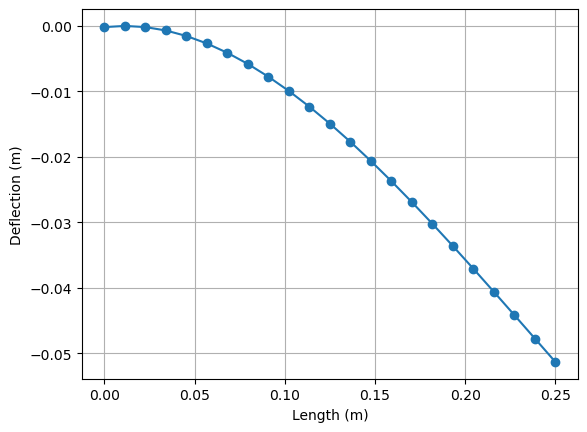

In [14]:
u_v_defl = np.linalg.solve(A_general, b_u_v(n, h, P, E, I)) # Solving matrix system 
u_defl = u_v_defl[:n+3] # desired solution
plt.plot(x_grid, u_defl, "o-");
plt.grid()
plt.xlabel("Length (m)")
plt.ylabel("Deflection (m)")
print(f"Computed deflection of the right end (L): {abs(round(u_defl[-1]*100, 2))} (cm)")

* **(10pt)** Find the solution $u$ in the analytic form. Compare $~u(L)~$ with $~u_h(L)~$ for $~h = L/25,L/50,L/100~$. As you decrease $~h~$ by a factor or 2, by what factor does the difference $~|u_h(L) − u(L)|~$ decrease?

Let's find the solution $u$ in the analytical form:

$$ (EIv)'' =0 $$

$$ (EIv)' =C_1 $$

$$ EIv =C_1x +C_2 $$
Using boundary conditions:
$$ \qquad\qquad EIv(L)=0 \qquad (EIv)'(L)=P \qquad \qquad \quad $$
We can find the constants:
$$ C_1 = P,  C_2 = -PL $$
Then, let's back to $u$:

$$ (EIu)'' = P(x-L)$$
$$(EIu)'=\frac{P}{2}x^2 - PLx + C $$
$$ EIu=\frac{P}{6}x^3 - \frac{P}{2}Lx^2 + Cx + C`$$
From B.C. $C = 0, C` = 0$:
$$ \qquad\qquad u(x) = \frac{P}{2EI}(\frac{x^3}{3} - Lx^2)  \qquad \qquad \quad $$

In [15]:
def u_true(x):
    return P/(2*E*I)*(x**3/3 - L*x**2)

Computed deflection of the right end (L) for n = 25: 5.06 (cm)
Theoretical deflection of the right end (L): 4.77 (cm)
Difference: 0.29 (cm)

Computed deflection of the right end (L) for n = 50: 4.91 (cm)
Theoretical deflection of the right end (L): 4.77 (cm)
Difference: 0.14 (cm)

Computed deflection of the right end (L) for n = 100: 4.84 (cm)
Theoretical deflection of the right end (L): 4.77 (cm)
Difference: 0.07 (cm)



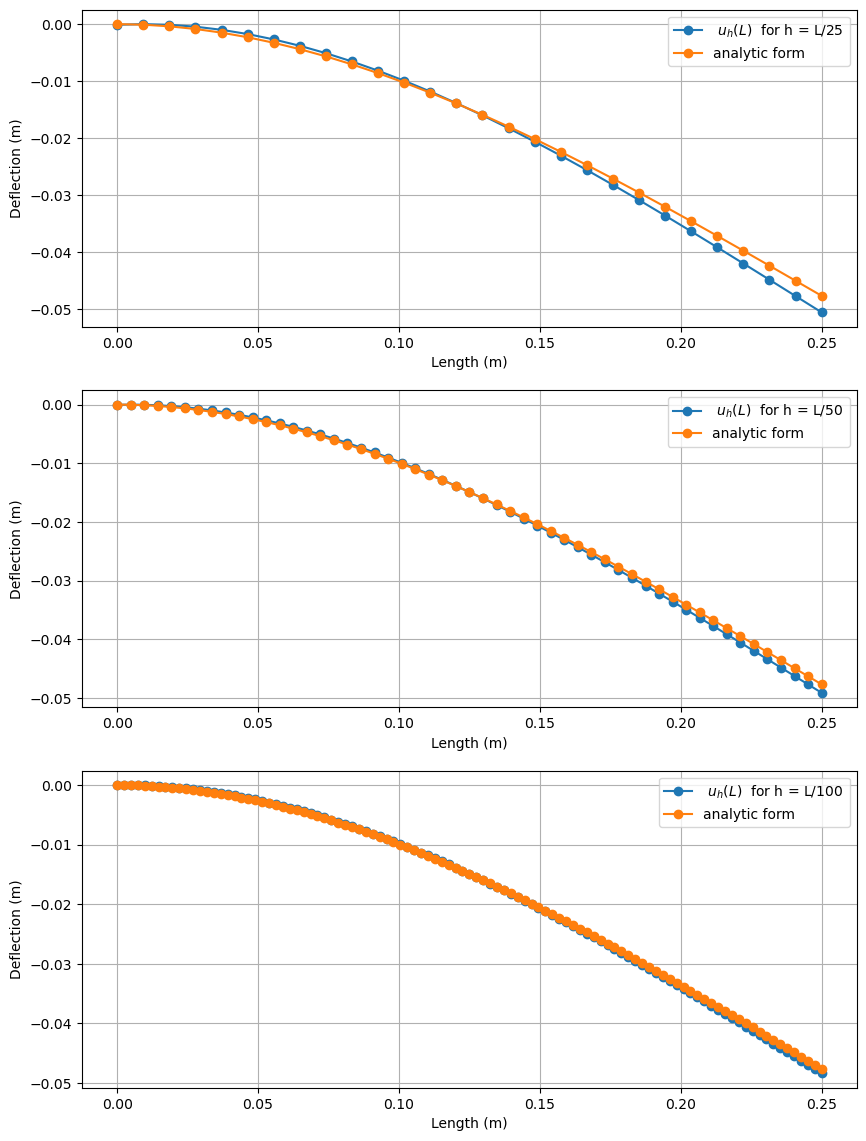

In [16]:
# Comparison of analytical and numerical solutions

number = [25, 50, 100]

fig, ax = plt.subplots(3, figsize = (10,14))

for i, n in enumerate(number):
    
    h = L / n
    x_grid = np.linspace(0, L, n + 3)
    A_general = np.block([[A_matrix_u(n), A_matrix_v_u(n, h)], [A_matrix_zero(n), A_matrix_v(n)]])
    u_v_defl = np.linalg.solve(A_general, b_u_v(n, h, P, E, I))
    u_defl = u_v_defl[:n+3]
    
    analytical = [u_true(x) for x in x_grid]
    
    ax[i].plot(x_grid, u_defl, "o-", label = f"$~u_h(L)~$ for h = L/{n} ")
    ax[i].plot(x_grid, analytical, "o-", label = "analytic form")
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("Length (m)")
    ax[i].set_ylabel("Deflection (m)")
    print(f"Computed deflection of the right end (L) for n = {n}: {abs(round(u_defl[-1]*100, 2))} (cm)")
    print(f"Theoretical deflection of the right end (L): {abs(round(analytical[-1]*100, 2))} (cm)")
    print(f"Difference: {round(abs(u_defl[-1]*100) - abs(analytical[-1]*100), 2)} (cm)\n")

h:  [2.0, 2.0, 2.0, 2.0, 2.0]
Difference: [2.00836820083682, 2.0027932960893855, 2.0, 2.0112359550561796, 1.9777777777777779]


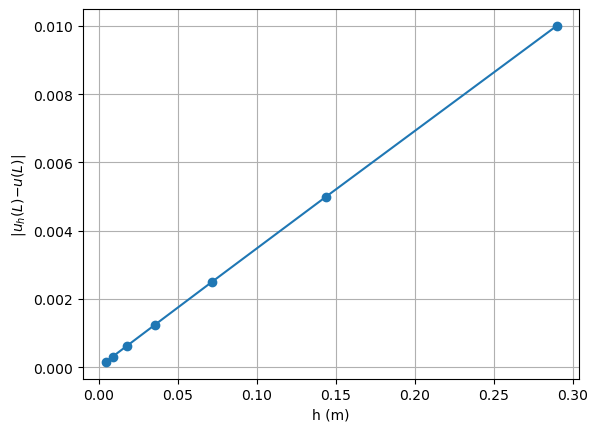

In [17]:
# Investigate the error with different h

number = [25, 50, 100, 200, 400, 800, 1600]

step = []
error = []
for i, n in enumerate(number):
    
    h = L / n
    x_grid = np.linspace(0, L, n + 3)
    A_general = np.block([[A_matrix_u(n), A_matrix_v_u(n, h)], [A_matrix_zero(n), A_matrix_v(n)]])
    u_v_defl = np.linalg.solve(A_general, b_u_v(n, h, P, E, I))
    u_defl = u_v_defl[:n+3]
    analytical = [u_true(x) for x in x_grid]

    step.append(h)
    error.append(round(abs(u_defl[-1]*100) - abs(analytical[-1]*100), 4))
    
u_ref = u_defl
plt.plot(error, step, "o-")
plt.grid()
plt.xlabel("h (m)")
plt.ylabel("$~|u_h(L) − u(L)|~$ ");

print("h: ", [step[i]/step[i+1] for i in range(1, len(step)-1)])
print("Difference:", [error[i]/error[i+1] for i in range(1, len(error)-1)])

* **(10pt)** Compute $~\sigma _{\min}(A_h)~$ and $~\sigma _{\max}(A_h)~$ for $~h = L/25, L/50, L/100$, where $A_h$ is the matrix of the discretized linear system. As you decrease $~h~$ by a factor or 2, by what factor does $\operatorname{cond}(A_h)$ increase? (Alternatively, compute $\lambda _{\min}(A_h)$ and $\lambda _{\max}(A_h)$ and comment on how $\lambda _{\max}(A_h)$/$\lambda _{\min}(A_h)$ increases.)

In [18]:
number = [25, 50, 100, 200, 400]

step = []
cond = []
for n in number:
    h = L / n
    step.append(h)
    A_general = np.block([[A_matrix_u(n), A_matrix_v_u(n, h)], [A_matrix_zero(n), A_matrix_v(n)]])
    u, s, vh = np.linalg.svd(A_general, full_matrices=True)
    print(f"For n = {n}:")
    print(f"s_min = {round(s.min(), 4)}; s_max = {round(s.max(), 4)}")
    print(f"cond(A_h) = {round(s.max()/s.min(), 3)}\n")
    cond.append(round(s.max()/s.min(), 3))
    
print("h: ", [step[i]/step[i+1] for i in range(1, len(step)-1)])
print("Cond:", [cond[i+1]/cond[i] for i in range(1, len(cond)-1)])

For n = 25:
s_min = 0.005; s_max = 3.9876
cond(A_h) = 803.896

For n = 50:
s_min = 0.0013; s_max = 3.9965
cond(A_h) = 3041.89

For n = 100:
s_min = 0.0003; s_max = 3.9991
cond(A_h) = 11822.492

For n = 200:
s_min = 0.0001; s_max = 3.9998
cond(A_h) = 46601.0

For n = 400:
s_min = 0.0; s_max = 3.9999
cond(A_h) = 185026.581

h:  [2.0, 2.0, 2.0]
Cond: [3.886561315497931, 3.9417239614118578, 3.9704422866462092]


**Cond(A_h) increase by factor ~ $4$.**

### Problem 3 (30pt)

Let all parameters be the same as in Problem 1 except for $H(x) = (3 − 2x/L)(2 + \cos(18πx/L)) · 6\, \text{mm}$.

* **(10pt)** Formulate the corresponding finite difference problem.

With this problem statement, we should modify the matrix connected with $v$. Let's discretize the equation:
$$ (EIv)'' =0 $$
$$ (EIv)'' = \frac{EI_{N + 1}v_{N + 1} − 2EI_Nv_N + EI_{N-1}v_{N - 1}}{h^2} = 0$$
B.C.:
$$ (EIv)'(L) = P $$
$$EI_{N + 1}v_{N + 1} − EI_{N-1}v_{N - 1} = 2Ph$$



In [19]:
n = 400
h = L/n
x = np.linspace(0, L, n+3)

def H(x):
    H = (3 - 2 * x / L) * (2 + np.cos(18 * np.pi * x / L)) * 0.006
    return H
H_3 = np.array([H(i)**3 for i in x])

def Inert_(W, H_3, E):
    I = E*W*H_3/12
    return I

In [20]:
# To take into account H(x), we need to change only one matrix in our block one

def A_matrix_v(n, Inert_):
    A = np.zeros((n + 3, n + 3))
    # Fill in the matrix. Boundaries.
    A[-2][-2] = 1
    A[-1][-1], A[-1][-3] = Inert_[-1], -Inert_[-3]
    # Diagonals
    for k in range(0, n + 1):
        A[k][k] = Inert_[k]
        A[k][k+1] = -2*Inert_[k+1]
        A[k][k+2] = Inert_[k+2]
    return A

def b_u_v(n, P, h):
    b_u_v = np.zeros(2*(n + 3))
    b_u_v[-1] = 2*P*h
    return b_u_v

* **(10pt)** Write the corresponding code.

In [21]:
A_general = np.block([[A_matrix_u(n), A_matrix_v_u(n, h)], [A_matrix_zero(n), A_matrix_v(n, Inert_(W, H_3, E))]])

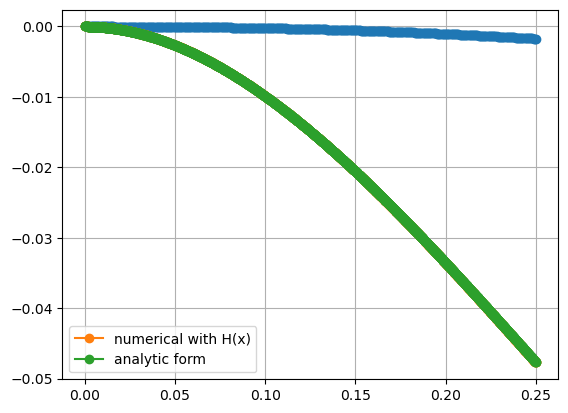

In [22]:
u_v_defl_H = np.linalg.solve(A_general, b_u_v(n, P, h))
u_defl_H = u_v_defl_H[:n + 3]
u_defl_H
plt.plot(x, u_defl_H, "o-");
plt.plot(x_grid, u_defl, "o-", label = "numerical with H(x)")
plt.plot(x_grid, analytical, "o-", label = "analytic form")
plt.grid()
plt.legend();

* **(10pt)** Assuming that the beam fractures at the point where the modulus of the quantity $\sigma(x) = u''(x)H(x)$ is largest, find the point where the beam should fracture. Give details on how you compute it (e.g., what value of h you used).

To compute this:

$$\sigma_N = \frac{u_{N+1} - 2u_N + u_{N-1}}{h^2}H_N$$

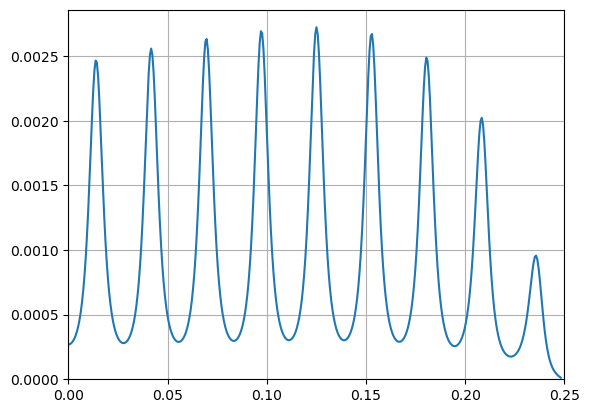

In [23]:
sigma = np.abs((u_defl_H[2:-2] - 2*u_defl_H[1:-3] + u_defl_H[:-4])*H(x)[1:-3]/h**2)
plt.plot(x[1:-3], sigma);
plt.grid()
plt.xlim(0, 0.25)
plt.ylim(0);

In [24]:
index = np.where(sigma == sigma.max())
print(f"n - {n}")
print(f"Fracture point - {x[1:-3][index][0]} (m)")

n - 400
Fracture point - 0.125 (m)


It means that the fracture point tin the middle of the beam.

***